In [16]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import sqrt

#df = pd.read_csv("../../dataset/cleaned.csv", infer_datetime_format = True,  parse_dates=['DateTime'], index_col = ['DateTime'])

#df.head()

**SARIMA model for prediction on weekly basis**

In [7]:
weeklyData = pd.read_csv("../../dataset/weeklyData.csv", infer_datetime_format = True, parse_dates = ['DateTime'], index_col = ['DateTime'])
weeklyGAP = weeklyData['Global_active_power']

weeklyGAP.head()

DateTime
2006-12-17     4599.636
2006-12-24    17477.618
2006-12-31    19749.552
2007-01-07    14961.068
2007-01-14    16179.556
Name: Global_active_power, dtype: float64

In [10]:
#Performing Augmented Dickey fuller test
X = weeklyGAP.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The series is stationary the result is statistically significant

ADF Statistic: -3.465038
p-value: 0.008932


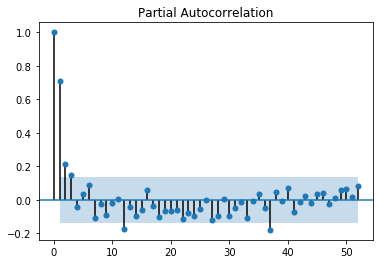

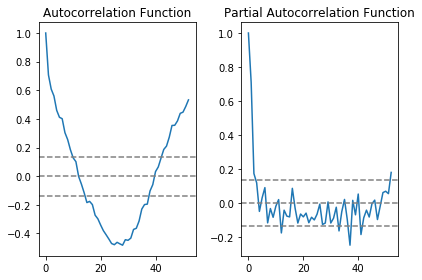

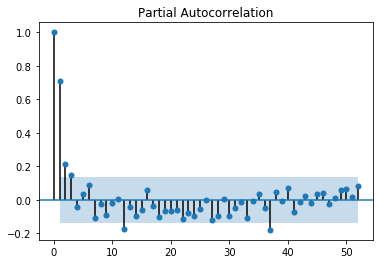

In [21]:
plot_acf(weeklyGAP, lags = 100)

#Plot acf

lag_acf = acf(weeklyGAP, nlags=52)
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(weeklyGAP)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(weeklyGAP)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#plot pacf
lag_pacf = pacf(weeklyGAP, nlags=52, method='ols')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(weeklyGAP)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(weeklyGAP)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plot_pacf(weeklyGAP, lags = 52)


In [37]:
# Predicting on a weekly basis
# Trying to find the best parameters

season_duration = 52 #Because there are 52 weeks in a year

mod = sm.tsa.statespace.SARIMAX(weeklyGAP,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, season_duration),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2509      0.071     -3.525      0.000      -0.390      -0.111
ma.L1          0.3990      0.253      1.577      0.115      -0.097       0.895
ar.S.L52      -0.3066      0.006    -48.284      0.000      -0.319      -0.294
sigma2      4.806e+06   6.83e-08   7.04e+13      0.000    4.81e+06    4.81e+06


**Model Diagnostics**

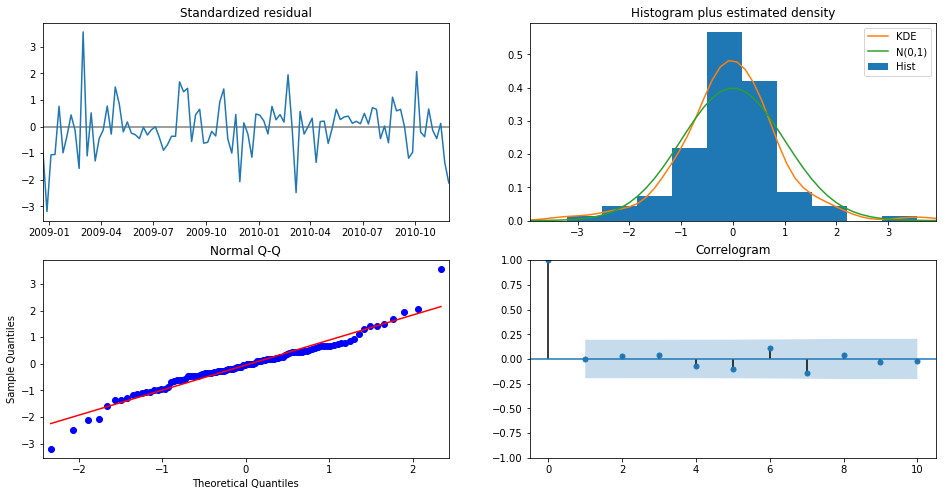

In [12]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

**One Step Ahead forecast using the current model**

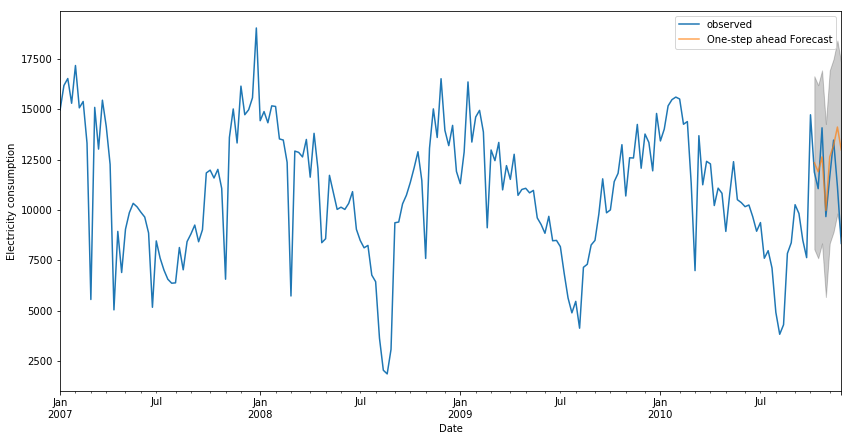

In [13]:
pred = results.get_prediction(start = '2010-10-10', dynamic=False)
pred_ci = pred.conf_int()

ax = weeklyGAP['2007':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity consumption')
plt.legend()

plt.show()

**SARIMA model for prediction on Daily basis**

In [35]:
dailyData = pd.read_csv("../../dataset/dailyData.csv", infer_datetime_format = True, parse_dates = ['DateTime'], index_col = ['DateTime'])
dailyGAP = dailyData['Global_active_power']

dailyGAP.head()

DateTime
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Name: Global_active_power, dtype: float64

In [25]:
#Performing Augmented Dickey fuller test
X = dailyGAP.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The series is stationary the result is statistically significant

ADF Statistic: -3.705085
p-value: 0.004042


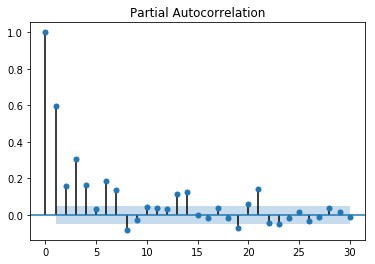

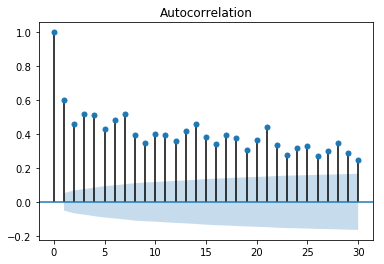

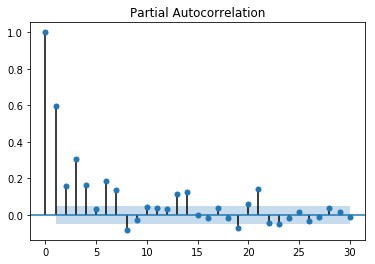

In [32]:
plot_acf(dailyGAP, lags = 30)
'''
#Plot acf

lag_acf = acf(dailyGAP, nlags=52)
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dailyGAP)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dailyGAP)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#plot pacf
lag_pacf = pacf(dailyGAP, nlags=52, method='ols')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dailyGAP)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dailyGAP)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
'''
plot_pacf(dailyGAP, lags = 30)


In [69]:
# Predicting on a daily basis
# Trying to find the best parameters

season_duration = 0 

mod = sm.tsa.statespace.SARIMAX(dailyGAP,
                                order=(3, 1, 3),
                                seasonal_order=(0, 0, 0, season_duration),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1528      0.298     -0.513      0.608      -0.737       0.431
ar.L2         -0.8631      0.198     -4.355      0.000      -1.252      -0.475
ar.L3          0.2845      0.292      0.975      0.330      -0.287       0.856
ma.L1         -0.4682    563.925     -0.001      0.999   -1105.740    1104.804
ma.L2          0.5859    200.741      0.003      0.998    -392.860     394.032
ma.L3         -0.8453    300.337     -0.003      0.998    -589.495     587.804
sigma2      1.859e+05      0.006   3.04e+07      0.000    1.86e+05    1.86e+05


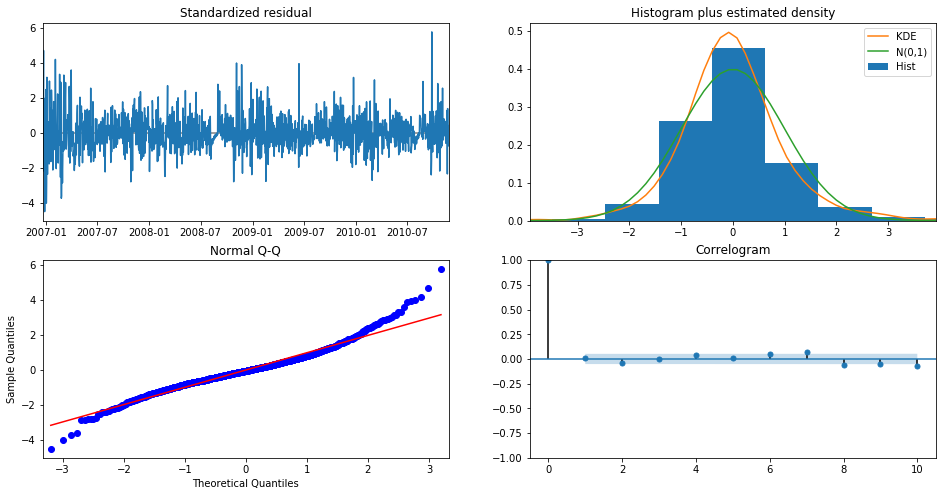

In [70]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

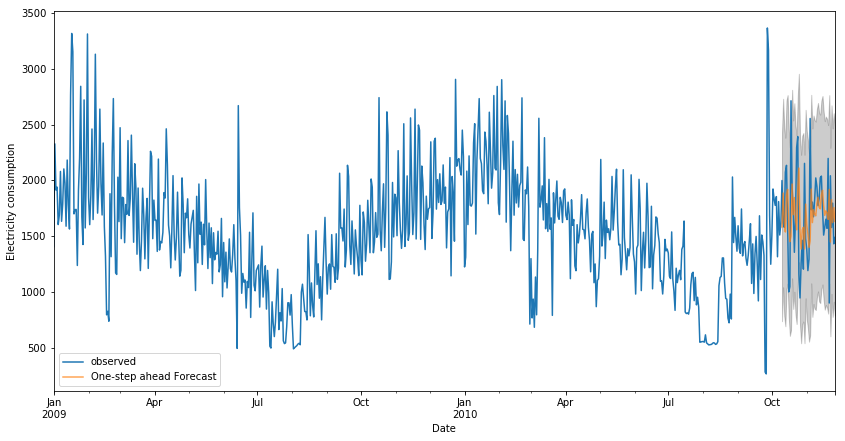

In [71]:
pred = results.get_prediction(start = '2010-10-10', dynamic=False)
pred_ci = pred.conf_int()

ax = dailyGAP['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity consumption')
plt.legend()

plt.show()

**SARIMA model for prediction on Monthly basis**

In [46]:
monthlyData = pd.read_csv("../../dataset/monthlyData.csv", infer_datetime_format = True, parse_dates = ['DateTime'], index_col = ['DateTime'])
monthlyGAP = monthlyData['Global_active_power']

monthlyGAP.head()

DateTime
2006-12-31    41826.806
2007-01-31    69017.230
2007-02-28    56496.828
2007-03-31    58862.574
2007-04-30    36529.322
Name: Global_active_power, dtype: float64

In [48]:
#Performing Augmented Dickey fuller test
X = monthlyGAP.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The series is stationary the result is statistically significant

ADF Statistic: -5.290767
p-value: 0.000006


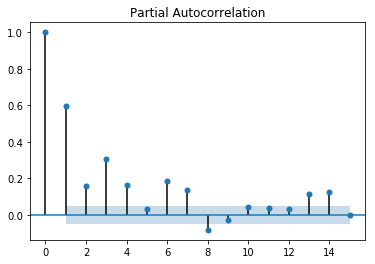

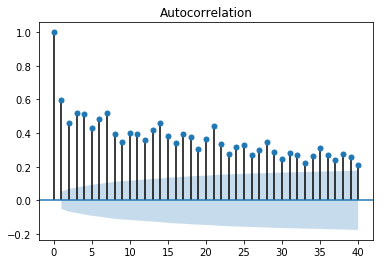

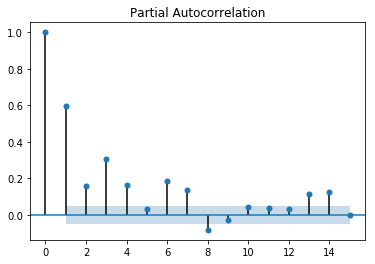

In [51]:
plot_acf(dailyGAP, lags = 40)
'''
#Plot acf

lag_acf = acf(dailyGAP, nlags=52)
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dailyGAP)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dailyGAP)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#plot pacf
lag_pacf = pacf(dailyGAP, nlags=52, method='ols')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dailyGAP)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dailyGAP)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
'''
plot_pacf(dailyGAP, lags = 15)


In [80]:
# Predicting on a monthly basis
# Trying to find the best parameters

season_duration = 12 # There are 12 months in year 
newMonthGAP = monthlyGAP['2007':]

mod = sm.tsa.statespace.SARIMAX(newMonthGAP,
                                order=(2, 0, 2),
                                seasonal_order=(1, 0, 0, season_duration),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9821   8.62e-05   1.14e+04      0.000       0.982       0.982
ar.L2         -0.5187   3.02e-05  -1.72e+04      0.000      -0.519      -0.519
ma.L1         -1.3373        nan        nan        nan         nan         nan
ma.L2          0.7092   1.04e-19   6.84e+18      0.000       0.709       0.709
ar.S.L12       0.9785      0.001   1684.013      0.000       0.977       0.980
sigma2      9.953e+07   1.41e-13   7.07e+20      0.000    9.95e+07    9.95e+07


/home/srikumar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/srikumar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/home/srikumar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/srikumar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/srikumar/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


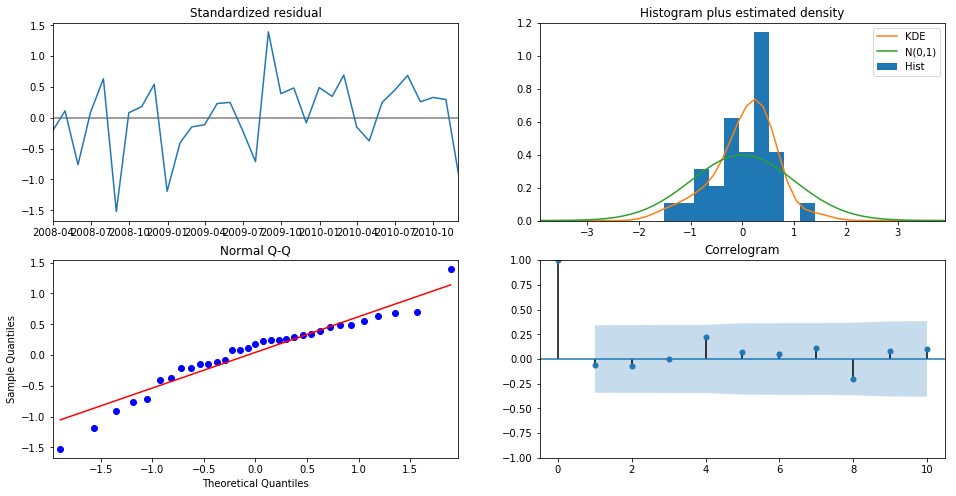

In [81]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

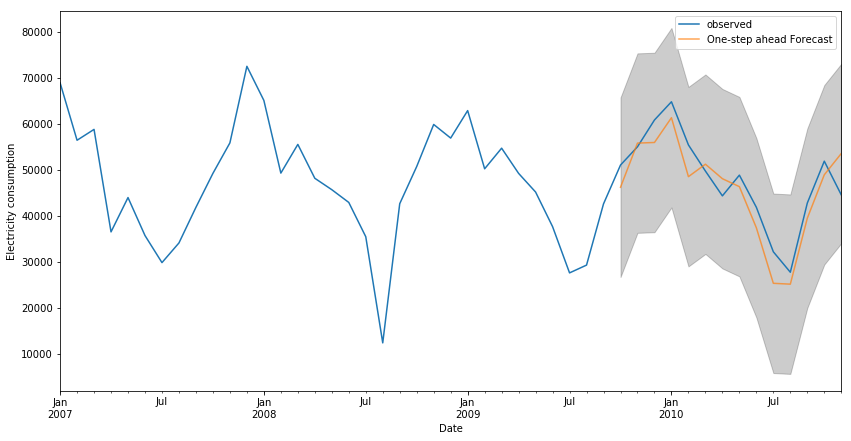

In [82]:
pred = results.get_prediction(start = '2009-10-31', dynamic=False)
pred_ci = pred.conf_int()

ax = monthlyGAP['2007':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity consumption')
plt.legend()

plt.show()